## SVM中的核函数

In [1]:
import numpy as np
import matplotlib.pyplot as plt

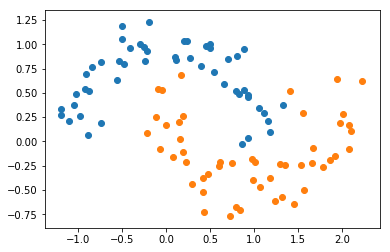

In [2]:
from sklearn import datasets

X, y = datasets.make_moons(noise=0.15, random_state=666)

plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [3]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

def PolynomialSVC(degree, C=1.0):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("linearSVC", LinearSVC(C=C))
    ])

In [4]:
poly_svc = PolynomialSVC(degree=3)
poly_svc.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearSVC', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [5]:
from sklearn.svm import SVC

def PolynomialKernelSVC(degree, C=1.0):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("kernelSVC", SVC(kernel="poly", degree=degree, C=C))
    ])

In [6]:
poly_kernel_svc = PolynomialSVC(degree=3)
poly_kernel_svc.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearSVC', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

### 比较Polynomial Features SVM和Polynomial Kernel SVM的效率

In [7]:
big_X, big_y = datasets.make_moons(n_samples=1000, noise=0.15)

In [8]:
%timeit poly_svc.fit(big_X, big_y)

100 loops, best of 3: 7.63 ms per loop


In [9]:
%timeit poly_kernel_svc.fit(big_X, big_y)

100 loops, best of 3: 8.1 ms per loop


### 比较 LinearSVM 和 Linear Kernel SVM 的效率

In [10]:
def StandardLinearSVC(C=1.0):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("linearSVC", LinearSVC(C=C))
    ])

linearSVC = StandardLinearSVC()
%timeit linearSVC.fit(big_X, big_y)

100 loops, best of 3: 4.25 ms per loop


In [11]:
def LinearKernelSVC(C=1.0):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("linearKernelSVC", SVC(kernel="linear", C=C))
    ])

linearKernelSVC = LinearKernelSVC()
%timeit linearKernelSVC.fit(big_X, big_y)

100 loops, best of 3: 12.7 ms per loop
